In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train_test = pd.concat([train, test])
train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


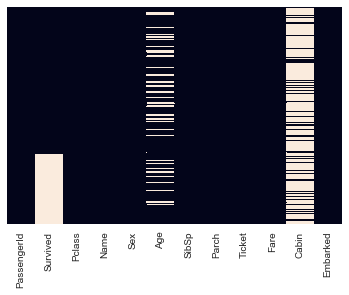

In [5]:
sns.heatmap(data=train_test.isnull(), yticklabels=False, cbar=False)

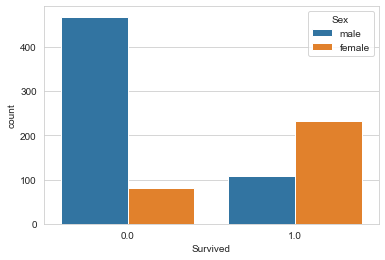

In [6]:
sns.countplot(x='Survived', data=train_test, hue='Sex')

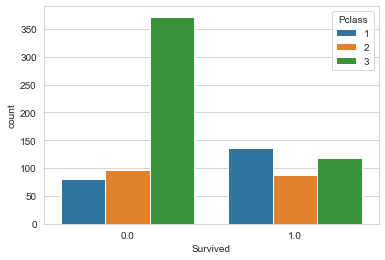

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train_test)

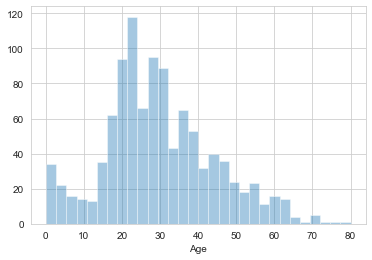

In [8]:
sns.distplot(train_test['Age'].dropna(), kde=False, bins=30)

In [9]:
train_test['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [10]:
def getTitle(string):
    #We want to get just the title.
    return string.split(',')[1].split('.')[0]

train_test['Title'] = train_test['Name'].apply(getTitle)
train_test.drop('Name', axis=1, inplace=True)

In [11]:
#Here we get the means of the classes to fill in the missing age values.
firstMean = train_test[train_test['Pclass'] == 1]['Age'].mean()
secondMean = train_test[train_test['Pclass'] == 2]['Age'].mean()
thirdMean = train_test[train_test['Pclass'] == 3]['Age'].mean()

In [12]:
def fillInAge(columns):
    #This indexing only works when indexing a row
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return float(int(firstMean))
        elif Pclass == 2:
            return float(int(secondMean))
        elif Pclass == 3:
            return float(int(thirdMean))
    else:
        return Age

train_test['Age'] = train_test[['Age', 'Pclass']].apply(fillInAge, axis=1)
train_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


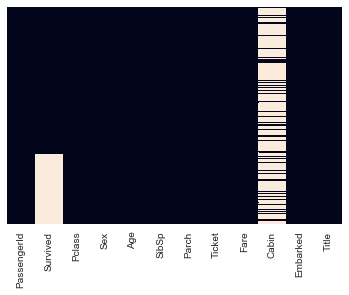

In [13]:
sns.heatmap(data=train_test.isnull(), yticklabels=False, cbar=False)

In [14]:
sex = pd.get_dummies(train_test['Sex'], drop_first=True)
embark = pd.get_dummies(train_test['Embarked'], drop_first=True)
title = pd.get_dummies(train_test['Title'], drop_first=True)
train_test.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)
train_test = pd.concat([train_test,sex,embark, title],axis=1)

In [15]:
train_test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
train_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0.0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1.0,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1.0,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0.0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [16]:
train_full = train_test[train_test['Survived'].isnull() == False]
train_full.info()
test_full = train_test[train_test['Survived'].isnull() == True]
test_full.drop('Survived', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    float64
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   male           891 non-null    uint8  
 8   Q              891 non-null    uint8  
 9   S              891 non-null    uint8  
 10   Col           891 non-null    uint8  
 11   Don           891 non-null    uint8  
 12   Dona          891 non-null    uint8  
 13   Dr            891 non-null    uint8  
 14   Jonkheer      891 non-null    uint8  
 15   Lady          891 non-null    uint8  
 16   Major         891 non-null    uint8  
 17   Master        891 non-null    uint8  
 18   Miss     

C:\Users\Manuel Santana\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
X = train_full.drop('Survived', axis=1)
y = train_full['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [19]:
logModel.fit(X_train, y_train)

C:\Users\Manuel Santana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
logPred = logModel.predict(X_test)
print('Reports of Logistic Model')
print(classification_report(y_test, logPred))
print('\n')
print(confusion_matrix(y_test, logPred))

Reports of Logistic Model
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       134
         1.0       0.76      0.67      0.71        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



[[115  19]
 [ 29  60]]


In [21]:
#Now we try the random forrest method on the same train test split
from sklearn.ensemble import RandomForestClassifier
titForr = RandomForestClassifier()
titForr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
forrPred = titForr.predict(X_test)

In [23]:
print('Report for Random Forrest Method')
print(classification_report(y_test, forrPred))
print('\n')
print(confusion_matrix(y_test, forrPred))

Report for Random Forrest Method
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84       134
         1.0       0.78      0.67      0.72        89

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



[[117  17]
 [ 29  60]]


In [24]:
from sklearn.svm import SVC

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,5,10,50,100,500,1000], 'gamma':[.1, .05, .01, .005, .001, .0005, .0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=1, gamma=0.1, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.1s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[CV] ................................ C=5, gamma=0.0001, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................................ C=5, gamma=0.0001, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................................ C=5, gamma=0.0001, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.1s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.1s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.1s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.1s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[CV] ................................ C=50, gamma=0.001, total=   0.0s
[CV] C=50, gamma=0.001 ...............................................
[CV] ................................ C=50, gamma=0.001, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] ............................... C=50, gamma=0.0005, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] ............................... C=50, gamma=0.0005, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] ............................... C=50, gamma=0.0005, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] ............................... C=50, gamma=0.0005, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] ............................... C=50, gamma=0.0005, total=   0.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .

[CV] ................................ C=500, gamma=0.01, total=   0.1s
[CV] C=500, gamma=0.01 ...............................................
[CV] ................................ C=500, gamma=0.01, total=   0.1s
[CV] C=500, gamma=0.01 ...............................................
[CV] ................................ C=500, gamma=0.01, total=   0.1s
[CV] C=500, gamma=0.005 ..............................................
[CV] ............................... C=500, gamma=0.005, total=   0.0s
[CV] C=500, gamma=0.005 ..............................................
[CV] ............................... C=500, gamma=0.005, total=   0.1s
[CV] C=500, gamma=0.005 ..............................................
[CV] ............................... C=500, gamma=0.005, total=   0.0s
[CV] C=500, gamma=0.005 ..............................................
[CV] ............................... C=500, gamma=0.005, total=   0.1s
[CV] C=500, gamma=0.005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   14.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50, 100, 500, 1000],
                         'gamma': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005,
                                   0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
gridPred = grid.predict(X_test)
grid.best_params_

{'C': 500, 'gamma': 0.0001}

In [27]:
print(confusion_matrix(y_test, gridPred))

[[109  25]
 [ 40  49]]


In [28]:
bestPred = np.zeros(len(gridPred))
for i in range(len(gridPred)):
    vote = gridPred[i] + forrPred[i] + logPred[i]
    if vote >= 2:
        bestPred[i] = 1
    else:
        bestPred[i] = 0
print(confusion_matrix(y_test, bestPred))
print(classification_report(y_test, bestPred))

[[118  16]
 [ 28  61]]
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       134
         1.0       0.79      0.69      0.73        89

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [31]:
#From this we see that we have one value that we need to replace. Probably with the average 3rd class ticket
test_full[test_full['Fare'].isnull() == True ]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Col,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
152,1044,3,60.5,0,0,NaN,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
test_full['Fare'][152] = test_full[test_full['Pclass'] ==3]['Fare'].mean()
test_full['Fare'][152]

C:\Users\Manuel Santana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


12.459677880184332

In [39]:
logFinal = logModel.predict(test_full)
forrFinal = titForr.predict(test_full)
gridFinal = grid.predict(test_full)

In [68]:
bestPred = [0]*len(logFinal)
for i in range(len(logFinal)):
    vote = logFinal[i] + forrFinal[i] + gridFinal[i]
    if vote >= 2:
        bestPred[i] = 1
    else:
        bestPred[i] = 0
bestPred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [69]:
passengers = test_full['PassengerId']
finalAnswer = pd.DataFrame({'PassengerID': passengers, 'Survived': bestPred})
finalAnswer.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [70]:
finalAnswer.to_csv('Titanic_Answer.csv', index=False)